In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
finetuned_res = json.load(open("./finetuned_res.json"))

baselines = {}
deciwatches = {}
newdeciwatches = {}
uniposes = {}
uniposes2 = {}

models_dict = {"baseline": baselines, "deciwatch": deciwatches, "newdeciwatch": newdeciwatches, "unipose": uniposes, "unipose2": uniposes2}

for k, v in finetuned_res.items():
    model_type = k.split("_")[0]
    models_dict[model_type][k] = v
    
colors = ["blue", "red", "green", "purple", "orange", "brown"]

In [3]:
no_processing_mean = 0.849

In [4]:
learning_rates = json.load(open("./finetuned_learning_rates.json", "r"))

for k in learning_rates.keys():
    learning_rates[k][0] = [1, [0.001]]

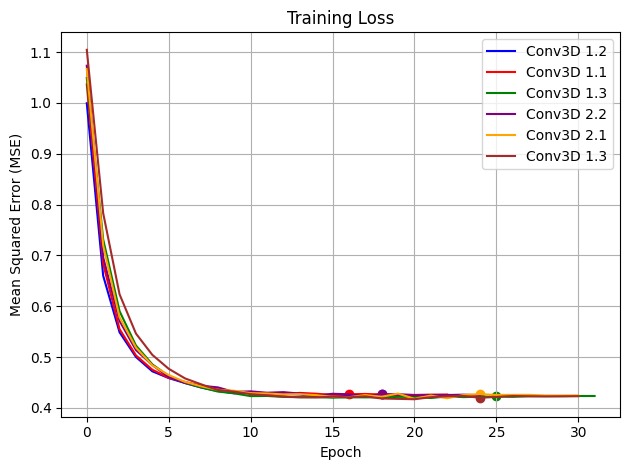

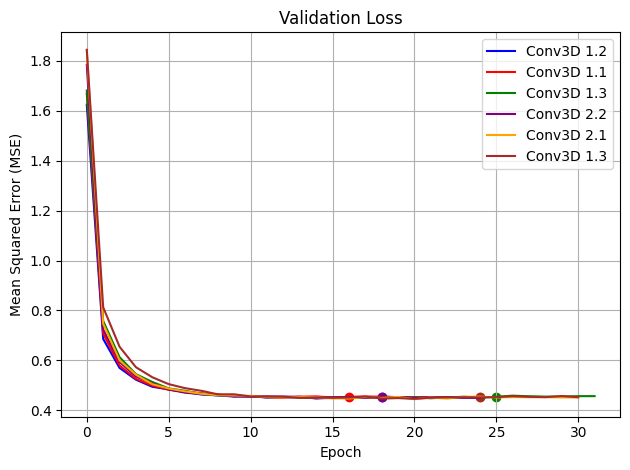

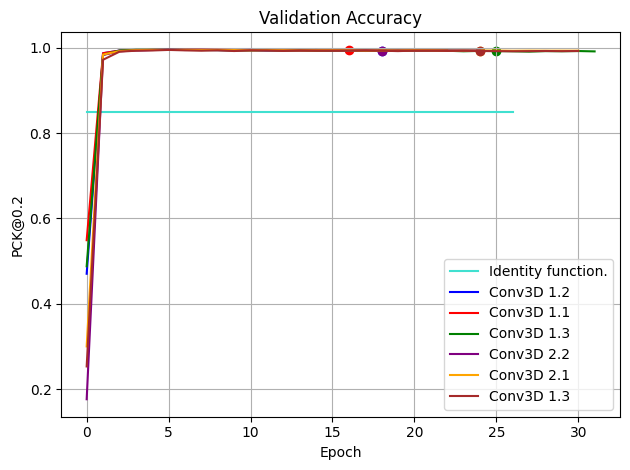

In [5]:
baseline_train_losses = {baseline_name: baseline["train_losses"] for baseline_name, baseline in baselines.items()}
baseline_val_losses = {baseline_name: baseline["val_losses"] for baseline_name, baseline in baselines.items()}
baseline_val_accs = {baseline_name: baseline["val_accs"] for baseline_name, baseline in baselines.items()}
baseline_learning_rates = {}
baseline_exps = {}
baseline_subexps = {}

for baseline_name, baseline in baselines.items():
    if baseline["config"]["input_name"] == "input_std" and baseline["config"]["interval_skip"] == 0:
        baseline_subexps[baseline_name] = 1
    elif baseline["config"]["input_name"] == "input_std" and baseline["config"]["interval_skip"] == 1:
        baseline_subexps[baseline_name] = 3
    elif baseline["config"]["input_name"] == "input" and baseline["config"]["interval_skip"] == 0:
        baseline_subexps[baseline_name] = 2
    else:
        print("baseline problem")

    baseline_exps[baseline_name] = baseline["config"]["noise_scalar"]
    baseline_learning_rates[baseline_name] = learning_rates[baseline_name]
    
baseline_xs = {}
baseline_ys = {}

for baseline_name, baseline_learning_rate in baseline_learning_rates.items():
    xs = {}
    ys = {}
    
    for i, (x, y) in enumerate(baseline_learning_rate):
        y = y[0]
        
        if y not in set(ys.values()):
            xs[i] = x
            ys[i] = y
    
    baseline_xs[baseline_name] = xs
    baseline_ys[baseline_name] = ys
    
plt.figure()
for i, (baseline_name, baseline_train_loss) in enumerate(baseline_train_losses.items()):
    color = colors[i]
    exp = baseline_exps[baseline_name]
    subexp = baseline_subexps[baseline_name]
    model_lr_reduction_xs = baseline_xs[baseline_name]
    
    plt.plot(np.arange(len(baseline_train_loss)), baseline_train_loss, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./baseline/train_losses.png")
plt.show()

plt.figure()
for i, (baseline_name, baseline_val_loss) in enumerate(baseline_val_losses.items()):
    color = colors[i]
    exp = baseline_exps[baseline_name]
    subexp = baseline_subexps[baseline_name]
    model_lr_reduction_xs = baseline_xs[baseline_name]
    
    
    plt.plot(np.arange(len(baseline_val_loss)), baseline_val_loss, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./baseline/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(baseline_val_accs, key=len))), [no_processing_mean] * len(max(baseline_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, (baseline_name, baseline_val_acc) in enumerate(baseline_val_accs.items()):
    color = colors[i]
    exp = baseline_exps[baseline_name]
    subexp = baseline_subexps[baseline_name]
    model_lr_reduction_xs = baseline_xs[baseline_name]
    
    
    plt.plot(np.arange(len(baseline_val_acc)), baseline_val_acc, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./baseline/val_accs.png")
plt.show()

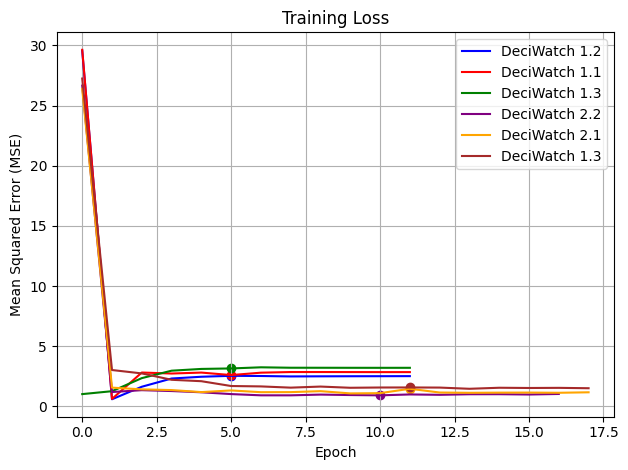

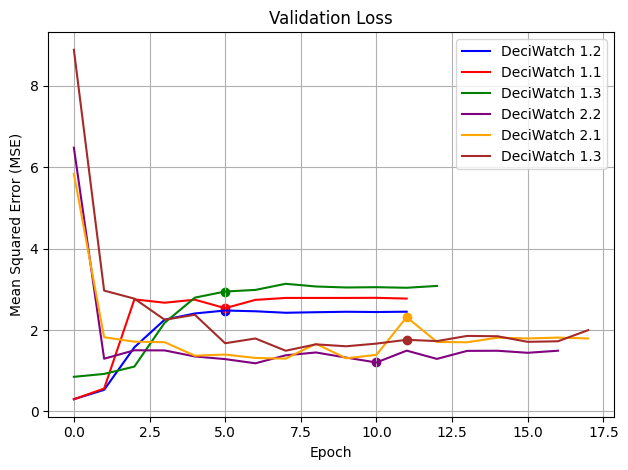

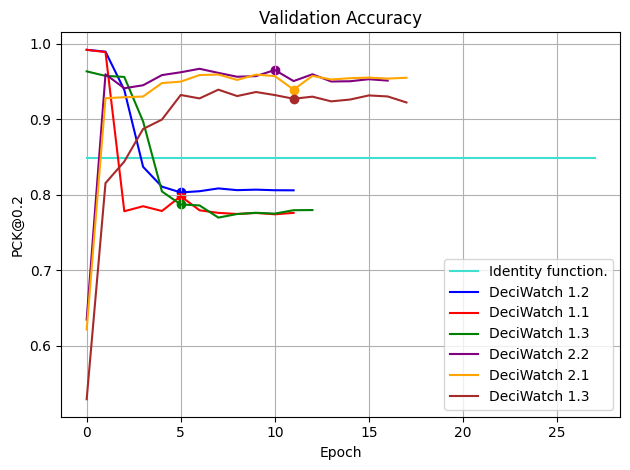

In [6]:
deciwatch_train_losses = {deciwatch_name: deciwatch["train_losses"] for deciwatch_name, deciwatch in deciwatches.items()}
deciwatch_val_losses = {deciwatch_name: deciwatch["val_losses"] for deciwatch_name, deciwatch in deciwatches.items()}
deciwatch_val_accs = {deciwatch_name: deciwatch["val_accs"] for deciwatch_name, deciwatch in deciwatches.items()}
deciwatch_learning_rates = {}
deciwatch_exps = {}
deciwatch_subexps = {}

for deciwatch_name, deciwatch in deciwatches.items():
    if deciwatch["config"]["input_name"] == "input_std" and deciwatch["config"]["interval_skip"] == 0:
        deciwatch_subexps[deciwatch_name] = 1
    elif deciwatch["config"]["input_name"] == "input_std" and deciwatch["config"]["interval_skip"] == 1:
        deciwatch_subexps[deciwatch_name] = 3
    elif deciwatch["config"]["input_name"] == "input" and deciwatch["config"]["interval_skip"] == 0:
        deciwatch_subexps[deciwatch_name] = 2
    else:
        print("deciwatch problem")

    deciwatch_exps[deciwatch_name] = deciwatch["config"]["noise_scalar"]
    deciwatch_learning_rates[deciwatch_name] = learning_rates[deciwatch_name]
    
deciwatch_xs = {}
deciwatch_ys = {}

for deciwatch_name, deciwatch_learning_rate in deciwatch_learning_rates.items():
    xs = {}
    ys = {}
    
    for i, (x, y) in enumerate(deciwatch_learning_rate):
        y = y[0]
        
        if y not in set(ys.values()):
            xs[i] = x
            ys[i] = y
    
    deciwatch_xs[deciwatch_name] = xs
    deciwatch_ys[deciwatch_name] = ys
    
plt.figure()
for i, (deciwatch_name, deciwatch_train_loss) in enumerate(deciwatch_train_losses.items()):
    color = colors[i]
    exp = deciwatch_exps[deciwatch_name]
    subexp = deciwatch_subexps[deciwatch_name]
    model_lr_reduction_xs = deciwatch_xs[deciwatch_name]
    
    plt.plot(np.arange(len(deciwatch_train_loss)), deciwatch_train_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./deciwatch/train_losses.png")
plt.show()

plt.figure()
for i, (deciwatch_name, deciwatch_val_loss) in enumerate(deciwatch_val_losses.items()):
    color = colors[i]
    exp = deciwatch_exps[deciwatch_name]
    subexp = deciwatch_subexps[deciwatch_name]
    model_lr_reduction_xs = deciwatch_xs[deciwatch_name]
    
    
    plt.plot(np.arange(len(deciwatch_val_loss)), deciwatch_val_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./deciwatch/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(deciwatch_val_accs, key=len))), [no_processing_mean] * len(max(deciwatch_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, (deciwatch_name, deciwatch_val_acc) in enumerate(deciwatch_val_accs.items()):
    color = colors[i]
    exp = deciwatch_exps[deciwatch_name]
    subexp = deciwatch_subexps[deciwatch_name]
    model_lr_reduction_xs = deciwatch_xs[deciwatch_name]
    
    
    plt.plot(np.arange(len(deciwatch_val_acc)), deciwatch_val_acc, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./deciwatch/val_accs.png")
plt.show()

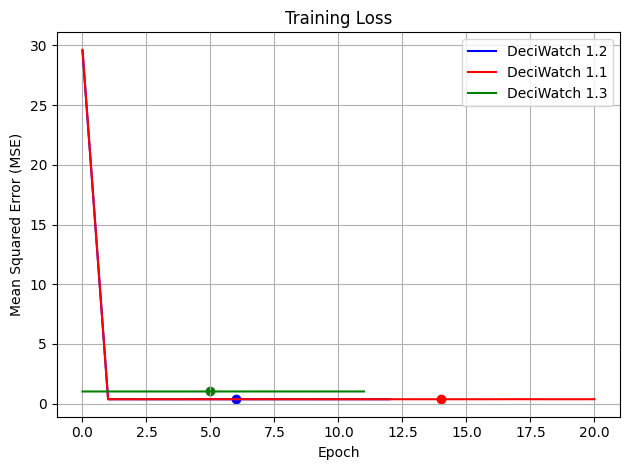

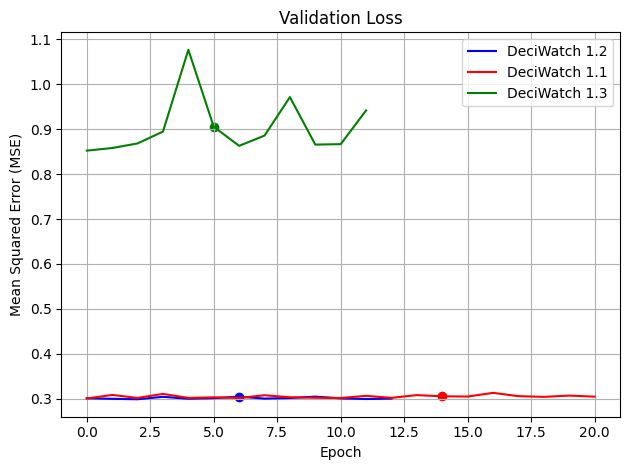

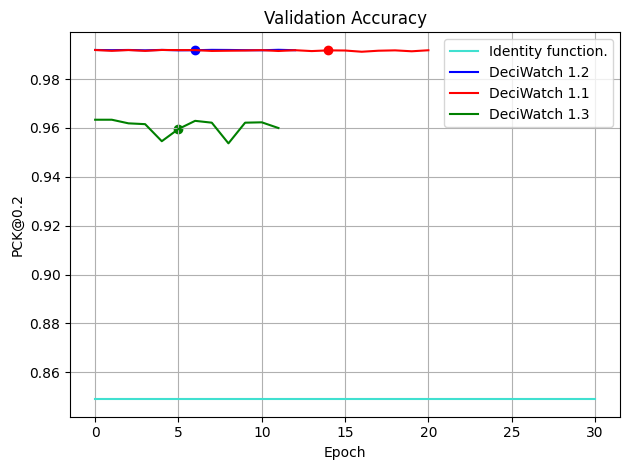

In [7]:
newdeciwatch_train_losses = {newdeciwatch_name: newdeciwatch["train_losses"] for newdeciwatch_name, newdeciwatch in newdeciwatches.items()}
newdeciwatch_val_losses = {newdeciwatch_name: newdeciwatch["val_losses"] for newdeciwatch_name, newdeciwatch in newdeciwatches.items()}
newdeciwatch_val_accs = {newdeciwatch_name: newdeciwatch["val_accs"] for newdeciwatch_name, newdeciwatch in newdeciwatches.items()}
newdeciwatch_learning_rates = {}
newdeciwatch_exps = {}
newdeciwatch_subexps = {}

for newdeciwatch_name, newdeciwatch in newdeciwatches.items():
    if newdeciwatch["config"]["input_name"] == "input_std" and newdeciwatch["config"]["interval_skip"] == 0:
        newdeciwatch_subexps[newdeciwatch_name] = 1
    elif newdeciwatch["config"]["input_name"] == "input_std" and newdeciwatch["config"]["interval_skip"] == 1:
        newdeciwatch_subexps[newdeciwatch_name] = 3
    elif newdeciwatch["config"]["input_name"] == "input" and newdeciwatch["config"]["interval_skip"] == 0:
        newdeciwatch_subexps[newdeciwatch_name] = 2
    else:
        print("newdeciwatch problem")

    newdeciwatch_exps[newdeciwatch_name] = newdeciwatch["config"]["noise_scalar"]
    newdeciwatch_learning_rates[newdeciwatch_name] = learning_rates[newdeciwatch_name]
    
newdeciwatch_xs = {}
newdeciwatch_ys = {}

for newdeciwatch_name, newdeciwatch_learning_rate in newdeciwatch_learning_rates.items():
    xs = {}
    ys = {}
    
    for i, (x, y) in enumerate(newdeciwatch_learning_rate):
        y = y[0]
        
        if y not in set(ys.values()):
            xs[i] = x
            ys[i] = y
    
    newdeciwatch_xs[newdeciwatch_name] = xs
    newdeciwatch_ys[newdeciwatch_name] = ys
    
plt.figure()
for i, (newdeciwatch_name, newdeciwatch_train_loss) in enumerate(newdeciwatch_train_losses.items()):
    color = colors[i]
    exp = newdeciwatch_exps[newdeciwatch_name]
    subexp = newdeciwatch_subexps[newdeciwatch_name]
    model_lr_reduction_xs = newdeciwatch_xs[newdeciwatch_name]
    
    plt.plot(np.arange(len(newdeciwatch_train_loss)), newdeciwatch_train_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, newdeciwatch_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./newdeciwatch/train_losses.png")
plt.show()

plt.figure()
for i, (newdeciwatch_name, newdeciwatch_val_loss) in enumerate(newdeciwatch_val_losses.items()):
    color = colors[i]
    exp = newdeciwatch_exps[newdeciwatch_name]
    subexp = newdeciwatch_subexps[newdeciwatch_name]
    model_lr_reduction_xs = newdeciwatch_xs[newdeciwatch_name]
    
    
    plt.plot(np.arange(len(newdeciwatch_val_loss)), newdeciwatch_val_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, newdeciwatch_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./newdeciwatch/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(newdeciwatch_val_accs, key=len))), [no_processing_mean] * len(max(newdeciwatch_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, (newdeciwatch_name, newdeciwatch_val_acc) in enumerate(newdeciwatch_val_accs.items()):
    color = colors[i]
    exp = newdeciwatch_exps[newdeciwatch_name]
    subexp = newdeciwatch_subexps[newdeciwatch_name]
    model_lr_reduction_xs = newdeciwatch_xs[newdeciwatch_name]
    
    
    plt.plot(np.arange(len(newdeciwatch_val_acc)), newdeciwatch_val_acc, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, newdeciwatch_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./newdeciwatch/val_accs.png")
plt.show()

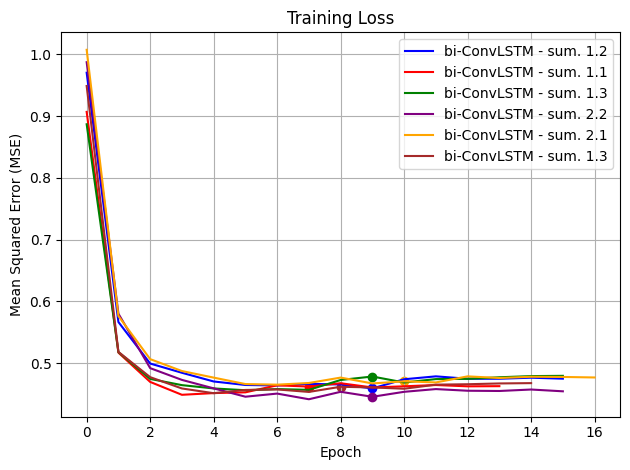

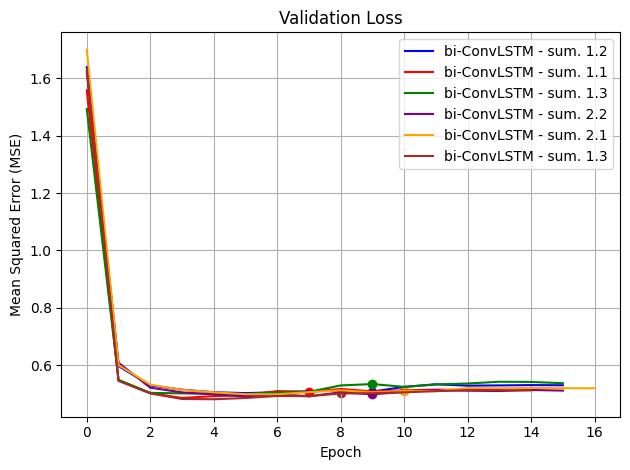

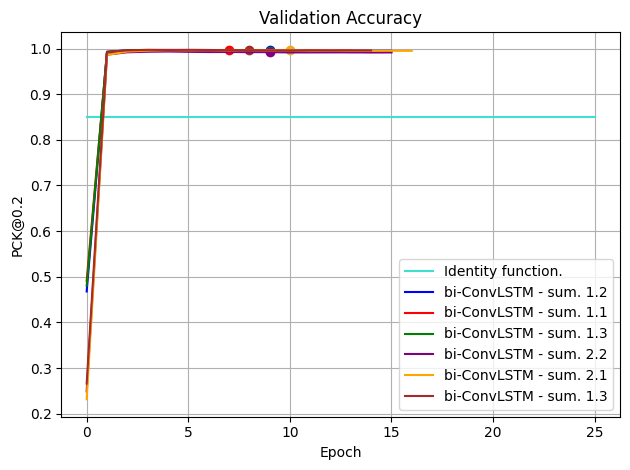

In [8]:
unipose_train_losses = {unipose_name: unipose["train_losses"] for unipose_name, unipose in uniposes.items()}
unipose_val_losses = {unipose_name: unipose["val_losses"] for unipose_name, unipose in uniposes.items()}
unipose_val_accs = {unipose_name: unipose["val_accs"] for unipose_name, unipose in uniposes.items()}
unipose_learning_rates = {}
unipose_exps = {}
unipose_subexps = {}

for unipose_name, unipose in uniposes.items():
    if unipose["config"]["input_name"] == "input_std" and unipose["config"]["interval_skip"] == 0:
        unipose_subexps[unipose_name] = 1
    elif unipose["config"]["input_name"] == "input_std" and unipose["config"]["interval_skip"] == 1:
        unipose_subexps[unipose_name] = 3
    elif unipose["config"]["input_name"] == "input" and unipose["config"]["interval_skip"] == 0:
        unipose_subexps[unipose_name] = 2
    else:
        print("unipose problem")

    unipose_exps[unipose_name] = unipose["config"]["noise_scalar"]
    unipose_learning_rates[unipose_name] = learning_rates[unipose_name]
    
unipose_xs = {}
unipose_ys = {}

for unipose_name, unipose_learning_rate in unipose_learning_rates.items():
    xs = {}
    ys = {}
    
    for i, (x, y) in enumerate(unipose_learning_rate):
        y = y[0]
        
        if y not in set(ys.values()):
            xs[i] = x
            ys[i] = y
    
    unipose_xs[unipose_name] = xs
    unipose_ys[unipose_name] = ys
    
plt.figure()
for i, (unipose_name, unipose_train_loss) in enumerate(unipose_train_losses.items()):
    color = colors[i]
    exp = unipose_exps[unipose_name]
    subexp = unipose_subexps[unipose_name]
    model_lr_reduction_xs = unipose_xs[unipose_name]
    
    plt.plot(np.arange(len(unipose_train_loss)), unipose_train_loss, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose/train_losses.png")
plt.show()

plt.figure()
for i, (unipose_name, unipose_val_loss) in enumerate(unipose_val_losses.items()):
    color = colors[i]
    exp = unipose_exps[unipose_name]
    subexp = unipose_subexps[unipose_name]
    model_lr_reduction_xs = unipose_xs[unipose_name]
    
    
    plt.plot(np.arange(len(unipose_val_loss)), unipose_val_loss, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(unipose_val_accs, key=len))), [no_processing_mean] * len(max(unipose_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, (unipose_name, unipose_val_acc) in enumerate(unipose_val_accs.items()):
    color = colors[i]
    exp = unipose_exps[unipose_name]
    subexp = unipose_subexps[unipose_name]
    model_lr_reduction_xs = unipose_xs[unipose_name]
    
    
    plt.plot(np.arange(len(unipose_val_acc)), unipose_val_acc, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose/val_accs.png")
plt.show()

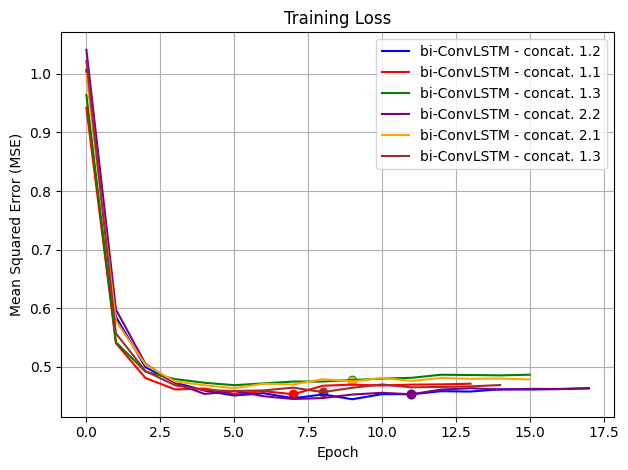

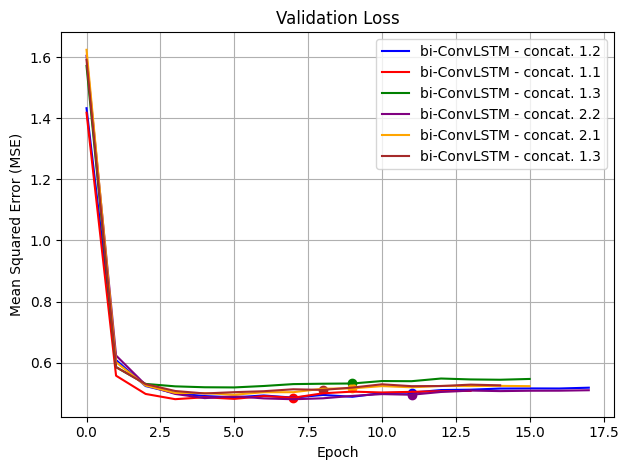

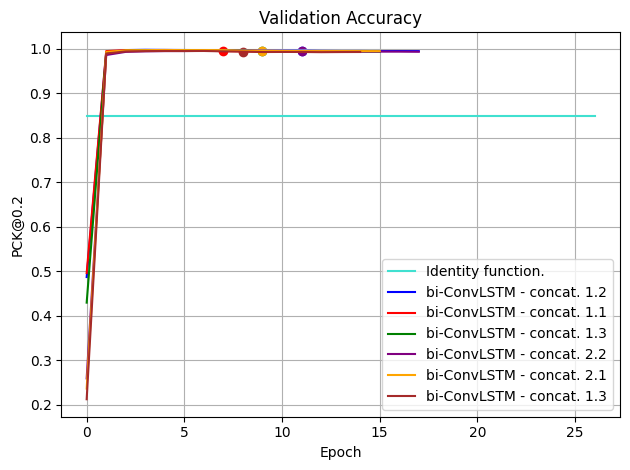

In [9]:
unipose2_train_losses = {unipose2_name: unipose2["train_losses"] for unipose2_name, unipose2 in uniposes2.items()}
unipose2_val_losses = {unipose2_name: unipose2["val_losses"] for unipose2_name, unipose2 in uniposes2.items()}
unipose2_val_accs = {unipose2_name: unipose2["val_accs"] for unipose2_name, unipose2 in uniposes2.items()}
unipose2_learning_rates = {}
unipose2_exps = {}
unipose2_subexps = {}

for unipose2_name, unipose2 in uniposes2.items():
    if unipose2["config"]["input_name"] == "input_std" and unipose2["config"]["interval_skip"] == 0:
        unipose2_subexps[unipose2_name] = 1
    elif unipose2["config"]["input_name"] == "input_std" and unipose2["config"]["interval_skip"] == 1:
        unipose2_subexps[unipose2_name] = 3
    elif unipose2["config"]["input_name"] == "input" and unipose2["config"]["interval_skip"] == 0:
        unipose2_subexps[unipose2_name] = 2
    else:
        print("unipose2 problem")

    unipose2_exps[unipose2_name] = unipose2["config"]["noise_scalar"]
    unipose2_learning_rates[unipose2_name] = learning_rates[unipose2_name]
    
unipose2_xs = {}
unipose2_ys = {}

for unipose2_name, unipose2_learning_rate in unipose2_learning_rates.items():
    xs = {}
    ys = {}
    
    for i, (x, y) in enumerate(unipose2_learning_rate):
        y = y[0]
        
        if y not in set(ys.values()):
            xs[i] = x
            ys[i] = y
    
    unipose2_xs[unipose2_name] = xs
    unipose2_ys[unipose2_name] = ys
    
plt.figure()
for i, (unipose2_name, unipose2_train_loss) in enumerate(unipose2_train_losses.items()):
    color = colors[i]
    exp = unipose2_exps[unipose2_name]
    subexp = unipose2_subexps[unipose2_name]
    model_lr_reduction_xs = unipose2_xs[unipose2_name]
    
    plt.plot(np.arange(len(unipose2_train_loss)), unipose2_train_loss, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose2/train_losses.png")
plt.show()

plt.figure()
for i, (unipose2_name, unipose2_val_loss) in enumerate(unipose2_val_losses.items()):
    color = colors[i]
    exp = unipose2_exps[unipose2_name]
    subexp = unipose2_subexps[unipose2_name]
    model_lr_reduction_xs = unipose2_xs[unipose2_name]
    
    
    plt.plot(np.arange(len(unipose2_val_loss)), unipose2_val_loss, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose2/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(unipose2_val_accs, key=len))), [no_processing_mean] * len(max(unipose2_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, (unipose2_name, unipose2_val_acc) in enumerate(unipose2_val_accs.items()):
    color = colors[i]
    exp = unipose2_exps[unipose2_name]
    subexp = unipose2_subexps[unipose2_name]
    model_lr_reduction_xs = unipose2_xs[unipose2_name]
    
    
    plt.plot(np.arange(len(unipose2_val_acc)), unipose2_val_acc, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./unipose2/val_accs.png")
plt.show()